In [85]:

# coding: utf-8


# mehmetaypar_yangöz

# ID: 20591




import numpy as np
import matplotlib.pyplot as plottt
from scipy import stats
from datetime import datetime
import seaborn as sns 
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

get_ipython().run_line_magic('matplotlib', 'inline')


import pandas as pandasss
from os.path import join

d_path = "./"
filename = "taxi-trips.csv"
dataFrame =pandasss.read_csv(join(d_path, filename))

dataFrame.head() # displays the given dataset's first 5 rows





,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695


In [86]:

print("latitude vs longitude")
dataFrame.shape # returns (rows, columns), shape of the dataframe as (rows, columns)






#  histograms to choose the better parameter:

## number of rows used as our identifiers and coloums used for user_id 
    





latitude vs longitude


(118185, 11)

In [87]:
dataFrame.dtypes # returns dataypes in dataFrame



# shape and datatype description end

## the data based on float and integer values -- also the object variables are represents string variables





id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [88]:
dataFrame.describe() # describes the mathematical structure of the dataframe such as mean, std. deviation, min, max, etc...
             # statistictics that summarize the columns 


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


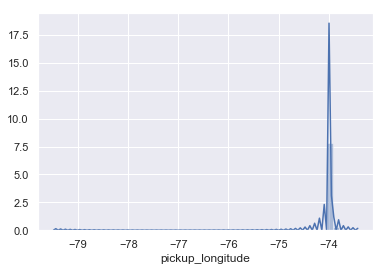

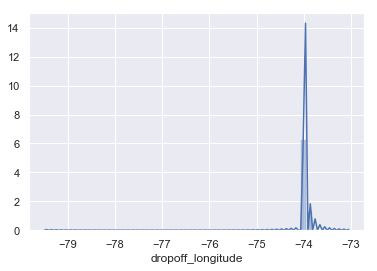

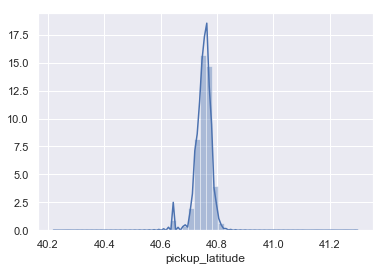

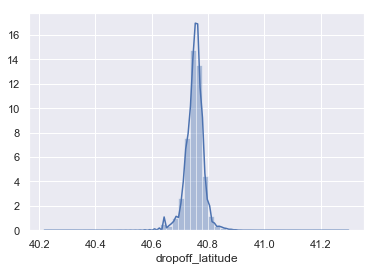

In [89]:
sns.distplot(dataFrame["pickup_longitude"], norm_hist = True)                       
plottt.show()  # observe that the bar is strictly on top of -74



sns.distplot(dataFrame["dropoff_longitude"], norm_hist = True) # observe that the bar is shifted towards the lower bound 
plottt.show()  



sns.distplot(dataFrame["pickup_latitude"], norm_hist = True)                       
plottt.show()  




sns.distplot(dataFrame["dropoff_latitude"], norm_hist = True)
plottt.show() 




# after observing these histograms:
    # since latitude has a much higher range, it could be very well chosen as a better parameter for research




# passenger count turns out to be an almost inefficient parameter (almost in all cases between 1-2);
# doesn't differ that much, not a good predicate for a certain research



import reverse_geocoder as rg # reverse geocoding 
import pprint

parameter = []

def get_coordinates(parameter):
    temp = []
    for i in range(len(parameter)):
        temp.append(parameter[i])
    return temp
pickup_long_array = dataFrame["pickup_longitude"]
p_long = get_coordinates(pickup_long_array)
dropoff_long_array = dataFrame["dropoff_longitude"]
d_long = get_coordinates(dropoff_long_array)
pickup_lat_array = dataFrame["pickup_latitude"]
p_lat = get_coordinates(pickup_lat_array)


dropoff_lat_array = dataFrame["dropoff_latitude"]
d_lat = get_coordinates(dropoff_lat_array)


# construct an array for pickups only
# then convert to tuple
coord = []
temp_array = []
pickup_list = []

for i in range(len(p_lat)):
    temp_arr = []
    temp_arr.append(p_lat[i])
    temp_arr.append(p_long[i])
    coord.append(temp_arr)

for i in range(len(coord)):
    temp_array.append(coord[i])
    tpl = tuple(coord[i])
    pickup_list.append(tpl)

res = rg.search(pickup_list)

# results for pickups 


In [90]:

# insert pickup district column
temp = []

for i in res:
    my_list = i['name']
    temp.append(my_list)
    
dataFrame["pickup_district"] = temp

dataFrame.head()




,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City


In [91]:
# In[24]:


import reverse_geocoder as rg # reverse geocoding 
import pprint

parameter = []

def get_coordinates(parameter):
    temp = []
    for i in range(len(parameter)):
        temp.append(parameter[i])
    return temp



dropoff_long_array = dataFrame["dropoff_longitude"]
d_long = get_coordinates(dropoff_long_array)
pickup_long_array = dataFrame["pickup_longitude"]
p_long = get_coordinates(pickup_long_array)
dropoff_lat_array = dataFrame["dropoff_latitude"]
d_lat = get_coordinates(dropoff_lat_array)

pickup_lat_array = dataFrame["pickup_latitude"]
p_lat = get_coordinates(pickup_lat_array)
# construct an array for dropoffs only
# then convert to tuple
coord = []
temp_array = []
dropoff_list = []

for i in range(len(d_lat)):
    temp_arr = []
    temp_arr.append(d_lat[i])
    temp_arr.append(d_long[i])
    coord.append(temp_arr)

for i in range(len(coord)):
    temp_array.append(coord[i])
    tpl = tuple(coord[i])
    dropoff_list.append(tpl)

res1 = rg.search(dropoff_list)






# show how average distance varies as time of the day changes

## he coordinates stored as tuple value for dropoff_district as the pickup_dist

In [92]:


# insert dropoff district column
temp = []

for i in res1:
    my_list = i['name']
    temp.append(my_list)
    
dataFrame["dropoff_district"] = temp
# results for dropoffs

dataFrame.head()





,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City


In [95]:
from geopy.distance import geodesic # insert distance column

miles = []

for i in range(len(pickup_list)):
    temp_1 = pickup_list[i]
    temp_2 = dropoff_list[i]
    distance = geodesic(temp_1, temp_2).miles  ## used geopy libraries for method of .miles() --reversegocoder içinde benzer açıklama yaz
    miles.append(distance)

dataFrame["distance"] = miles

dataFrame.head()



,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.933406,rush hour evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.178194,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.928961,rush hour morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.228003,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.562103,afternoon


In [99]:

# In[27]:


# insert time_of_day column

timeofday = [] # stores all pickup times

time_of_day = [] # column to be added to dataFrame

for i in range(len(dataFrame["pickup_datetime"])):
    start_index = dataFrame["pickup_datetime"][i].find(":")-2
    time = dataFrame["pickup_datetime"][i][start_index:len(dataFrame["pickup_datetime"][i])]
    timeofday.append(time)
    
my_parameter = ""
    
def sort_time(my_parameter):
    if("07:00:00"<=my_parameter<"09:00:00"):
        return "rush hour morning"
    elif("09:00:00"<=my_parameter<"16:00:00"):
        return "afternoon"
    elif("16:00:00"<=my_parameter<"18:00:00"):
        return "rush hour evening"
    elif("18:00:00"<=my_parameter<"23:00:00"):
        return "evening"
    else:
        return "latenight"

for i in range(len(timeofday)):
    if(sort_time(timeofday[i])=="rush hour morning"):
        time_of_day.append("rush hour morning")
    elif(sort_time(timeofday[i])=="afternoon"):
        time_of_day.append("afternoon")
    elif(sort_time(timeofday[i])=="rush hour evening"):
        time_of_day.append("rush hour evening")
    elif(sort_time(timeofday[i])=="evening"):
        time_of_day.append("evening")
    elif(sort_time(timeofday[i])=="latenight"):
        time_of_day.append("latenight")
        
dataFrame["time_of_day"] = time_of_day

dataFrame.head()



,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.933406,rush hour evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.178194,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.928961,rush hour morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.228003,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.562103,afternoon


Manhattan           45329
New York City       34625
Long Island City    17787
Weehawken           11334
The Bronx            2777
Name: pickup_district, dtype: int64


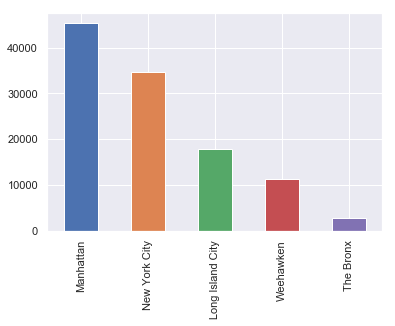

In [100]:

# In[28]:


# extract the top 5 pickup districts 

top5pdistricts = dataFrame.pickup_district.value_counts()[:5]
print(top5pdistricts)
top5pdistricts.plot(kind="bar")


# In[29]:


Manhattan           44478
New York City       31082
Long Island City    19919
Weehawken           10621
Brooklyn             2059
Name: dropoff_district, dtype: int64


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance
vendor_id,1.000000,0.293623,0.011391,0.007838,0.003093,0.006378,0.034313,0.003386
passenger_count,0.293623,1.000000,-0.004414,-0.001269,-0.002280,-0.003409,0.019177,0.005969
pickup_longitude,0.011391,-0.004414,1.000000,-0.101032,0.384399,0.052744,0.064542,0.456071
pickup_latitude,0.007838,-0.001269,-0.101032,1.000000,0.060402,0.443818,-0.048825,-0.299788
dropoff_longitude,0.003093,-0.002280,0.384399,0.060402,1.000000,0.126132,0.040602,0.329589
dropoff_latitude,0.006378,-0.003409,0.052744,0.443818,0.126132,1.000000,-0.043374,-0.156413
trip_duration,0.034313,0.019177,0.064542,-0.048825,0.040602,-0.043374,1.000000,0.163728
distance,0.003386,0.005969,0.456071,-0.299788,0.329589,-0.156413,0.163728,1.000000


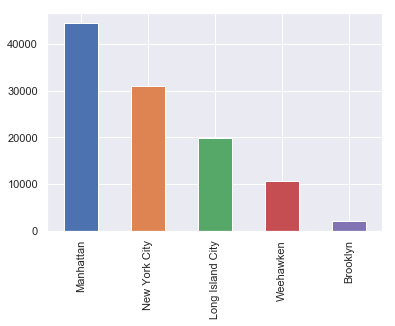

In [101]:


# extract the top 5 dropoff districts 

top5ddistricts = dataFrame.dropoff_district.value_counts()[:5]
print(top5ddistricts)
top5ddistricts.plot(kind="bar")


# In[30]:


dataFrame.corr() # coorelation matrix - shows how all data are correlated to one another


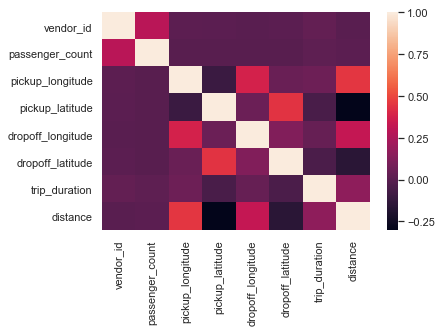

In [102]:
corr = dataFrame.corr()  # as an extra; we can use a heatmap to display the correlation between attributes

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


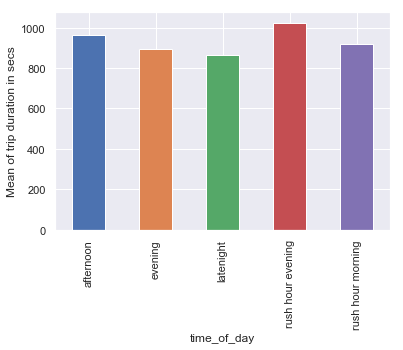

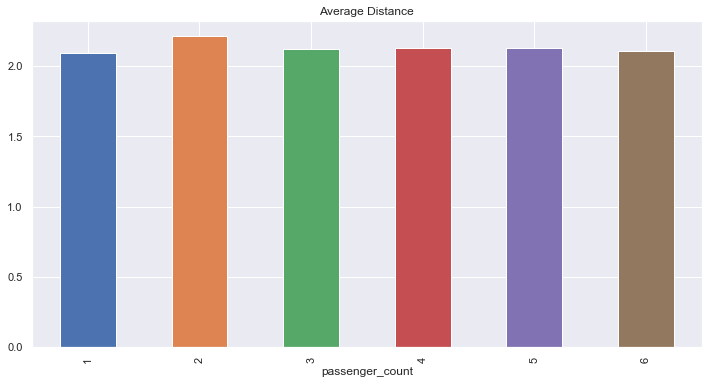

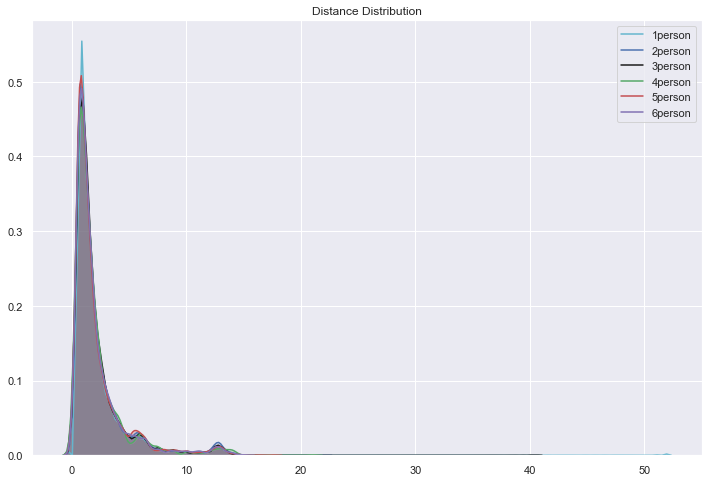

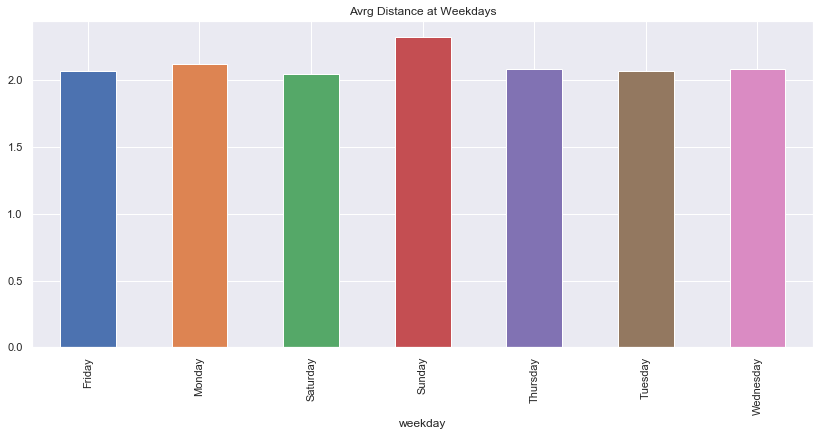

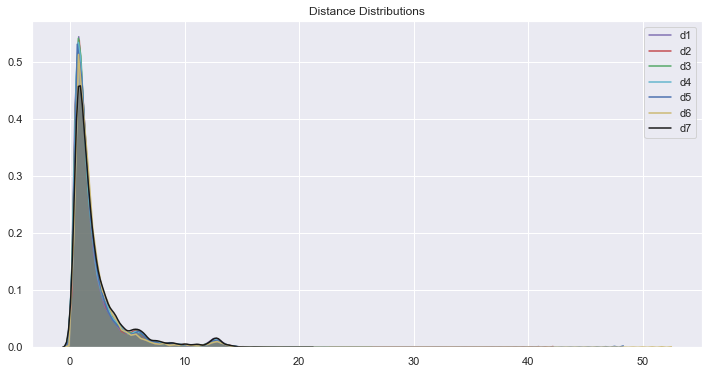

If all days of the week were to be examined at once;


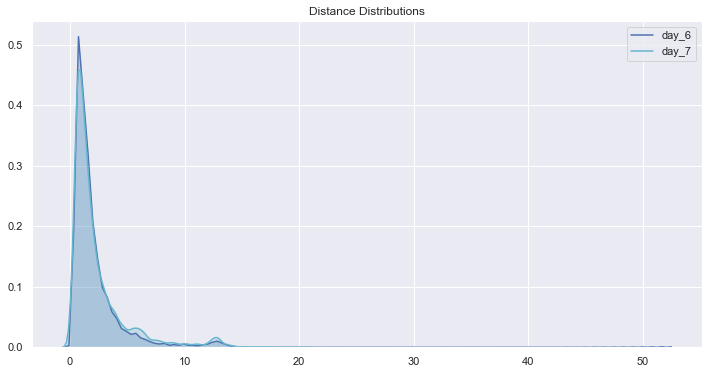

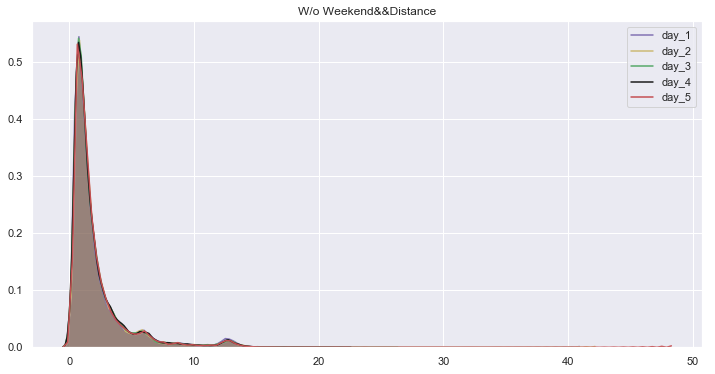

F_onewayResult(statistic=1.40786590976472, pvalue=0.22842344766578712)

In [103]:

# In[33]:


task_group = dataFrame.groupby(by="time_of_day") # distance(in miles) vs time of day
meanby_distance = task_group["distance"].mean()
plottt.ylabel("Average in Miles")
meanby_distance.plot(kind="bar")


# In[34]:


# show how the trip duration(in sec) varies as time of the day changes


# In[35]:


task_group = dataFrame.groupby(by="time_of_day")
duration = task_group["trip_duration"].mean()
plottt.ylabel("Mean of trip duration in secs")
duration.plot(kind="bar")


# # Hypothesis Testing
# # *** Null Hypothesis 1 - passenger group size has no effect on the distance ***


dataFrame["passenger_count"].unique()  # displays all different values of passenger counts -> [0,1,2,3,4,5,6]
# drop rows where passenger_count is 0
dataFrame = dataFrame[dataFrame["passenger_count"] != 0]

# graph and sort all these values to see
# if there is any correlation regarding the hypothesis
    
fig, ax = plottt.subplots(1, 1, figsize=(12,6))
pass_group= dataFrame.groupby(by="passenger_count")
avg_passcount = pass_group["distance"].mean() 

avg_passcount.plot(kind="bar", label="Passenger Samples")
ax.set_title("Average Distance")

# we have more than 2 samples, we can utilize ANOVA(USE KDE, density estimation)



my_test = "distance"

sizeof_1 = dataFrame[dataFrame["passenger_count"] == 1][my_test] # all samples assigned to different dataFrame's
sizeof_2 = dataFrame[dataFrame["passenger_count"] == 2][my_test] 
sizeof_3 = dataFrame[dataFrame["passenger_count"] == 3][my_test] # a KDE plot will provide us with better info;                                                      
sizeof_4 = dataFrame[dataFrame["passenger_count"] == 4][my_test] # a better estimation using densities
sizeof_5 = dataFrame[dataFrame["passenger_count"] == 5][my_test] 
sizeof_6 = dataFrame[dataFrame["passenger_count"] == 6][my_test] 

fig, ax = plottt.subplots(1,1, figsize=(12,8)) # utilization of ANOVA

sns.kdeplot(sizeof_1, shade=True, label="1person", ax=ax, color="c")
sns.kdeplot(sizeof_2, shade=True, label="2person", ax=ax, color="b")
sns.kdeplot(sizeof_3, shade=True, label="3person", ax=ax, color="k")
sns.kdeplot(sizeof_4, shade=True, label="4person", ax=ax, color="g")
sns.kdeplot(sizeof_5, shade=True, label="5person", ax=ax, color="r")
sns.kdeplot(sizeof_6, shade=True, label="6person", ax=ax, color="m")
plottt.title("Distance Distribution")
plottt.show()



stats.f_oneway(sizeof_1, sizeof_2, sizeof_3, sizeof_4, sizeof_5, sizeof_6)


# since we set the alpha level=0.05; any p-value below that lets us reject the null hypothesis
# therefore, we REJECT THE NULL HYPOTHESIS -> (pvalue<0.05)


# # *** Passenger sample size affects the distance covered ***

# # * Hypothesis Rejected *

# In[75]:


# additionally, Pearson Correlation could also be applied;


# In[70]:


stats.pearsonr(dataFrame["passenger_count"], dataFrame["distance"]) 


# In[71]:


# from the p-value, less than the significance level, we can see that our test is significant














# # * Null Hypothesis 2 - The day of the week has no effect on the distance *


import datetime#lib for taking date and time

dataFrame["pickup_datetime"] =pandasss.to_datetime(dataFrame["pickup_datetime"]) 

dow = dataFrame["pickup_datetime"].dt.weekday_name #gives a day

weekday = []

for i in dow:
    if(i=="Monday"):
        weekday.append("Monday")
    elif(i=="Tuesday"):
        weekday.append("Tuesday")
    elif(i=="Wednesday"):
        weekday.append("Wednesday")
    elif(i=="Thursday"):
        weekday.append("Thursday")
    elif(i=="Friday"):
        weekday.append("Friday")
    elif(i=="Saturday"):
        weekday.append("Saturday")
    else:
        weekday.append("Sunday")
        
dataFrame["weekday"] = weekday # insert this to the dataFrame, only to be cleared out later on
dataFrame.head()



fig, ax = plottt.subplots(1, 1, figsize=(14,6))  # analyse avg. distance covered on each day of the week 

weekday_group = dataFrame.groupby(by="weekday")
weekday_dist = weekday_group["distance"].mean() ## give definition of averge AYPAR
                                                    ########
weekday_dist.plot(kind="bar", ax=ax)
plottt.title("Avrg Distance at Weekdays")
plottt.show()




# since we have more than 2 samples, we can utilize ANOVA(USE KDE, density estimation)


my_test = "distance"

day_1 = dataFrame[dataFrame["weekday"] == "Monday"][my_test] # all samples assigned to different dataFrame's
day_2 = dataFrame[dataFrame["weekday"] == "Tuesday"][my_test] 
day_3 = dataFrame[dataFrame["weekday"] == "Wednesday"][my_test] # a KDE plot                                                    
day_4 = dataFrame[dataFrame["weekday"] == "Thursday"][my_test] # estimation using densities
day_5 = dataFrame[dataFrame["weekday"] == "Friday"][my_test] 
day_6 = dataFrame[dataFrame["weekday"] == "Saturday"][my_test] 
day_7 = dataFrame[dataFrame["weekday"] == "Sunday"][my_test] 


fig, ax = plottt.subplots(1,1, figsize=(12,6)) # utilization of ANOVA

sns.kdeplot(day_1, shade=True, label="d1", ax=ax, color="m")
sns.kdeplot(day_2, shade=True, label="d2", ax=ax, color="r")
sns.kdeplot(day_3, shade=True, label="d3", ax=ax, color="g")
sns.kdeplot(day_4, shade=True, label="d4", ax=ax, color="c")
sns.kdeplot(day_5, shade=True, label="d5", ax=ax, color="b")
sns.kdeplot(day_6, shade=True, label="d6", ax=ax, color="y")
sns.kdeplot(day_7, shade=True, label="d7", ax=ax, color="k")
plottt.title("Distance Distributions")
plottt.show()


print("If all days of the week were to be examined at once;")


stats.f_oneway(day_1, day_2, day_3, day_4, day_5, day_6, day_7) 


# since we set the alpha level=0.05; any p-value below that lets us reject the null hypothesis
# therefore, we REJECT THE NULL HYPOTHESIS -> (pvalue<0.05)



dataFrame = dataFrame.drop(columns=["weekday"]) #  drop the weekday column


# # * What if weekends are to be examined separately? *




dataFrame["pickup_datetime"] =pandasss.to_datetime(dataFrame["pickup_datetime"]) # datetime conversion

dow = dataFrame["pickup_datetime"].dt.weekday_name # returns days of week

weekday = []

for i in dow:
    if(i=="Monday"):
        weekday.append("Monday")
    elif(i=="Tuesday"):
        weekday.append("Tuesday")
    elif(i=="Wednesday"):
        weekday.append("Wednesday")
    elif(i=="Thursday"):
        weekday.append("Thursday")
    elif(i=="Friday"):
        weekday.append("Friday")
    elif(i=="Saturday"):
        weekday.append("Saturday")
    else:
        weekday.append("Sunday")
        
dataFrame["weekday"] = weekday # insert this to the dataFrame as teporraryly



my_test = "distance" # for Saturday and Sunday only

day_6 = dataFrame[dataFrame["weekday"] == "Saturday"][my_test] # all samples assigned to different dataFrame's
day_7 = dataFrame[dataFrame["weekday"] == "Sunday"][my_test]  # a KDE plot will provide us with better info;          
                                               # a better estimation using densities

fig, ax = plottt.subplots(1,1, figsize=(12,6)) # utilization of ANOVA

sns.kdeplot(day_6, shade=True, label="day_6", ax=ax, color="b")
sns.kdeplot(day_7, shade=True, label="day_7", ax=ax, color="c")
plottt.title("Distance Distributions")
plottt.show()



stats.f_oneway(day_6, day_7) # test p-value for weekends only


# in this case; we can directly conclude that a significant difference between the means exists 
# so we reject the null hypothesis ->(p-value<0.05(alpha))


# # * Considering weekends; we reject the null hypothesis; 
# # Weekends only; gives us a very small p-value(smaller than alpha which is 0.05); therefore it can be concluded that;
# # Weekends only, have smaller distance values in terms of taxi trips *



my_test = "distance" # test weekdays before weekends first

day_1 = dataFrame[dataFrame["weekday"] == "Monday"][my_test] # all samples assigned to different dataFrame's
day_2 = dataFrame[dataFrame["weekday"] == "Tuesday"][my_test] 
day_3 = dataFrame[dataFrame["weekday"] == "Wednesday"][my_test] # a KDE plot will provide us with better info;                                                      
day_4 = dataFrame[dataFrame["weekday"] == "Thursday"][my_test] # a better estimation using densities
day_5 = dataFrame[dataFrame["weekday"] == "Friday"][my_test] 

fig, ax = plottt.subplots(1,1, figsize=(12,6)) # utilization of ANOVA

sns.kdeplot(day_1, shade=True, label="day_1", ax=ax, color="m")
sns.kdeplot(day_2, shade=True, label="day_2", ax=ax, color="y")
sns.kdeplot(day_3, shade=True, label="day_3", ax=ax, color="g")
sns.kdeplot(day_4, shade=True, label="day_4", ax=ax, color="k")
sns.kdeplot(day_5, shade=True, label="day_5", ax=ax, color="r")
plottt.title("W/o Weekend&&Distance")
plottt.show()


# In[61]:


stats.f_oneway(day_1, day_2, day_3, day_4, day_5) 



# since we set the alpha level=0.05; any p-value below that lets us reject the null hypothesis
# therefore, we cannot directly reject the null hypothesis for weekdays -> (pvalue>0.05)
# in this case; we cannot conclude that a significant difference between the means exists. 


# # * Considering weekdays w/o weekends; does'nt let us reject the null hypothesis; 
# # so the null hypothesis is justified in this case 
# # Weekdays w/o weekends give us the p-value of 0.22 which is greater than 0.05(alpha); therefore it can be concluded that;
# # Statistically, weekdays w/o weekends have greater distance values in terms of taxi trips *   





# as a result of these;


# # * If all days of the week are analysed at once; 
#     # we reject the null hypothesis and say that:
# # Trip distances do not depend on days of the week and an increase in such is irrelevant *


# # * If all days of the week are analysed separately; *

# # Case 1(weekends only): Trip distances on weekends have no tendency to increase at all
# # Case 2(weekdays only): Trip distances on weekdays tend to increase as opposed to weekends
# 




In [104]:
#HYPOTHESIS TESTING for first case , This is also an a needed assignment
#Distance is longer for larger groups



In [108]:
onepassenger =  dataFrame.passenger_count<=1;

from scipy.stats import ttest_ind as ttest

print ( dataFrame[onepassenger].trip_duration.mean(),  dataFrame[~onepassenger].trip_duration.mean())
test = ttest( dataFrame[onepassenger].distance,  dataFrame[~onepassenger].distance)

if test[1] >= 0.05:
    print ('Null Cannot Be Rejected')
else:
    print ('Reject Null Hypothesis!')

898.4394827381659 998.784384313494
Reject Null Hypothesis!


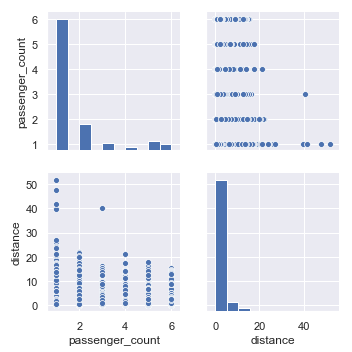

In [118]:
cols = ["passenger_count", "distance"]

sns.pairplot(data=dataFrame, vars=cols)

AttributeError: module 'scipy' has no attribute 'pearson'